In [1]:
# package import

import sys

lib_path = "../lib/algorithms"
sys.path.append(lib_path)

lib_path = "../lib/arms"
sys.path.append(lib_path)

lib_path = "../lib/simulation"
sys.path.append(lib_path)

import ucb
from ucb import UCB

import bernoulli
from bernoulli import BernoulliArm

import simulation
from simulation import test_algorithm

import random
import time

In [2]:
# declaration of some utility functions
def ind_max(x):
    m = max(x)
    return x.index(m)

In [4]:
random.seed(1)
#random.seed(time.time())

means = [0.1, 0.1, 0.1, 0.1, 0.9]
n_arms = len(means)
random.shuffle(means)
arms =  list(map(lambda mu: BernoulliArm(mu), means))
best_arm = ind_max(means)
print("Best arm is " + str(best_arm))

simulations = []
times = []
chosen_arms = []
rewards = []
cumulative_rewards = []
probability_of_select_bestarms = []

display_process = False

n_sim = 5000
horizon = 500

for sim in range(n_sim):
    algo = UCB(0, 0)
    algo.initialize(n_arms)
    results = test_algorithm(algo, arms, horizon)

    probability_of_select_bestarm = 0.0
    n_select_best = 0

    for i in range(len(results)):
        t, chosen_arm, reward, cumulative_reward = results[i]
        if chosen_arm == best_arm:
            n_select_best += 1
        probability_of_select_bestarm = n_select_best / float(t)

        simulations.append(sim)
        times.append(t)
        chosen_arms.append(chosen_arm)
        rewards.append(reward)
        cumulative_rewards.append(cumulative_reward)
        probability_of_select_bestarms.append(probability_of_select_bestarm)

        if display_process:
            print("simulation", sim,
                  "times", t, 
                  "chosen arm", chosen_arm, 
                  "reward", reward, 
                  "cumulative_reward", cumulative_reward, 
                  "probability_of_select_bestarm", probability_of_select_bestarm)

print("done")

Best arm is 2
done


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.DataFrame({'simulation': simulations,
                   'times': times,
                   'chosen_arm': chosen_arms,
                   'reward': rewards,
                   'cumulative_reward': cumulative_rewards,
                   'probability_of_select_bestarm': probability_of_select_bestarms})

df.head(5)

,chosen_arm,cumulative_reward,probability_of_select_bestarm,reward,simulation,times
0,0,0.0,0.000000,0.0,0,1
1,1,0.0,0.000000,0.0,0,2
2,2,1.0,0.333333,1.0,0,3
3,3,1.0,0.250000,0.0,0,4
4,4,2.0,0.200000,1.0,0,5


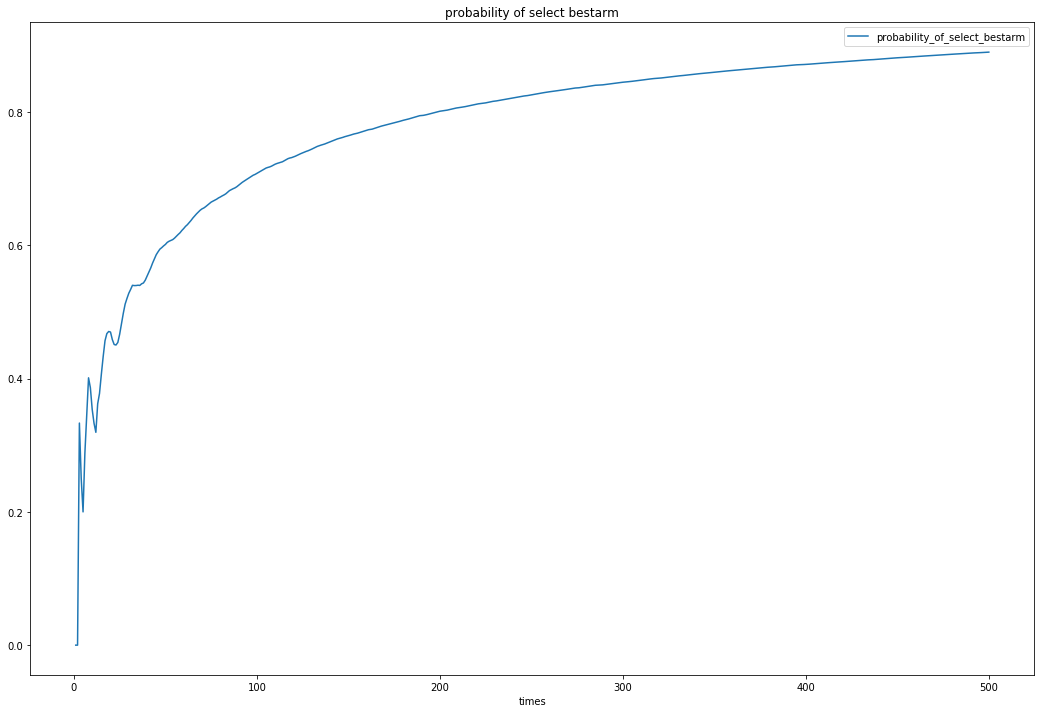

In [6]:
# probability of select best arm over times

prob_df = df.groupby(['times']).agg({'probability_of_select_bestarm': np.mean}).reset_index()
prob_df.plot(x='times', y='probability_of_select_bestarm', figsize=(18, 12), title='probability of select bestarm')

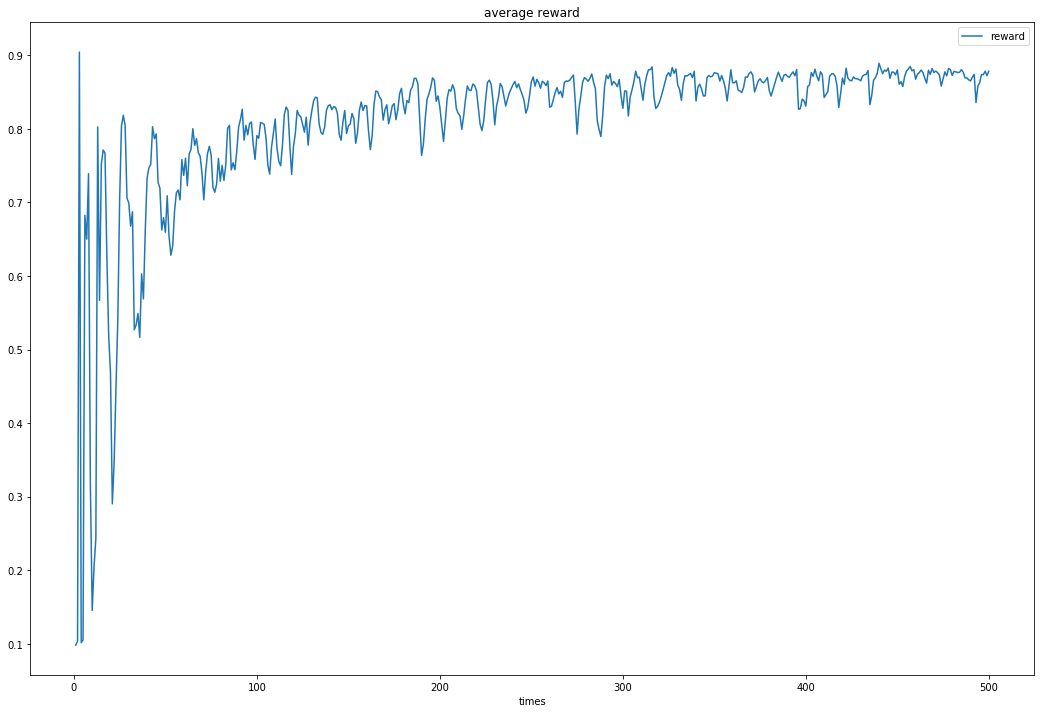

In [7]:
# reward over times

reward_df = df.groupby(['times']).agg({'reward': np.mean}).reset_index()
reward_df.plot(x='times', y='reward', figsize=(18, 12), title='average reward')

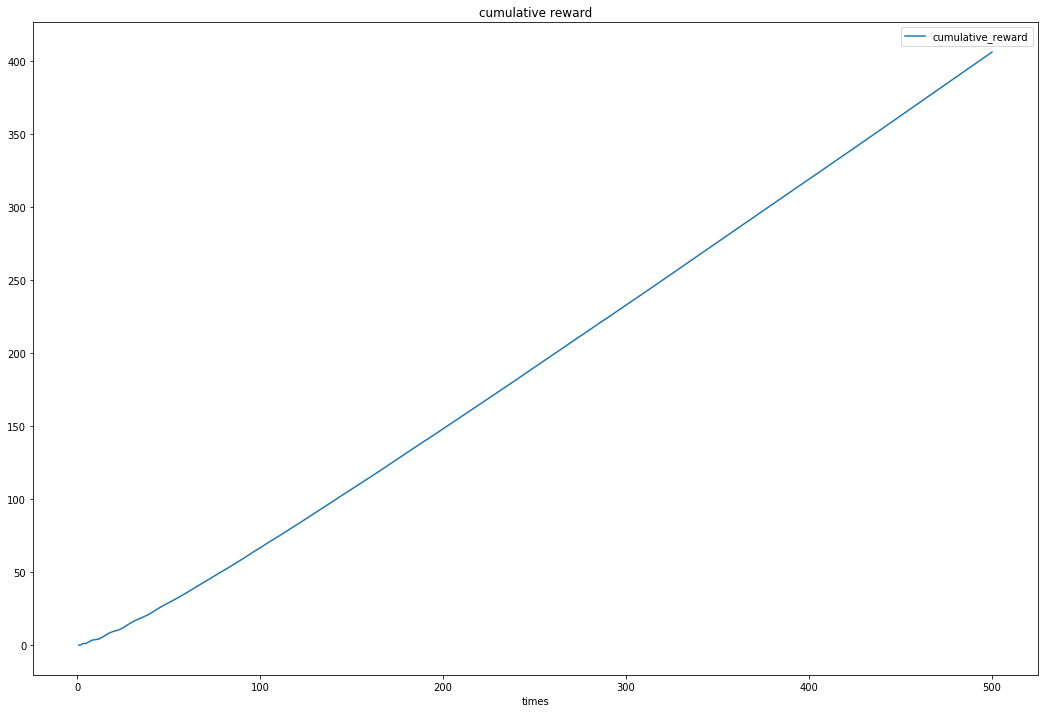

In [8]:
# cumulative reward over times

cumu_reward_df = df.groupby(['times']).agg({'cumulative_reward': np.mean}).reset_index()
cumu_reward_df.plot(x='times', y='cumulative_reward', figsize=(18, 12), title='cumulative reward')